# De Palabras a Sentimientos: Explorando reseñas de películas con NLP
`Proyecto final Data Science III`






# **1. Introducción**







El presente proyecto tiene como objetivo desarrollar un modelo de análisis de sentimientos utilizando una base de datos de reseñas de películas categorizadas como positivas y negativas. La base de datos se encuentra en inglés y fue tomada desde [acá](https://www.geeksforgeeks.org/best-nlp-datasets/#imdb-movie-reviews).

El análisis de sentimientos es una de las aplicaciones más comunes de la minería de texto y del procesamiento del lenguaje natural (NLP), y tiene amplias aplicaciones en diversos campos, como la opinión pública, el marketing y el servicio al cliente. Este proyecto explora diferentes enfoques para optimizar la capacidad predictiva de los modelos, utilizando métricas como el Accuracy para evaluar su desempeño.

Aunque este proyecto se centró en el uso de TF-IDF y n-gramas, existen otros enfoques teóricos y prácticos en el campo del análisis de sentimientos. Por ejemplo, los modelos de redes neuronales como LSTM y Transformers, que utilizan embeddings de palabras, permiten capturar relaciones semánticas complejas y han mostrado resultados prometedores en tareas similares. Asimismo, la combinación de modelos clásicos con técnicas avanzadas de aprendizaje profundo representa un camino viable para abordar problemas de análisis de sentimientos.


# **2. Metodología**

El proyecto se dividió en tres etapas principales, cada una con un enfoque específico para mejorar la precisión del modelo y mostrar las metodologías clave y más comunes a interesados en el procesamiento del lenguaje natural (NLP).

En primer lugar, ser trabajó con un **Modelo 1**, el cual implicó un modelo inicial de predicción utilizando la base de datos sin modificaciones importantes en el preprocesamiento. Este modelo sirvió como punto de referencia para evaluar mejoras posteriores.

Aunque el Modelo 1 resultó ser eficiente, decidimos dar un siguiente paso con la eliminación de stopwords y el uso de TF-IDF: el **Modelo 2**. Así, se elimianron palabras comunes en inglés y que no aportan significado específico (como “the”, “a”, “end”, "of"). Además, se utilizó la representación TF-IDF (Term Frequency - Inverse Document Frequency) para transformar los textos en vectores numéricos que reflejan la importancia relativa de las palabras en cada reseña. Este enfoque mejoró la precisión del modelo al reducir el ruido en los datos y resaltar las palabras más relevantes.

Finalmente, hicimos un **Modelo 3** con el uso de n-gramas (unigramas y bigramas).Se exploró el uso de n-gramas para capturar relaciones contextuales y patrones en los textos. Este enfoque permitió al modelo identificar frases completas o combinaciones de palabras que suelen estar asociadas con sentimientos positivos o negativos. El modelo basado en n-gramas alcanzó un Accuracy de 0.9103, el más alto de todos los modelos probados, destacándose por su capacidad para comprender el contexto del lenguaje.

# **3. Carga de datos**

La base de datos fue cargada desde Drive y está compuesta por 50 000 filas y dos columnas: *review* y *sentiment*. La primera columna incluye las reseñas de películas hechas por varias personas, y la segunda columna contiene nuestro *target*, es decir, si la reseña es positiva o negativa.

Ya desde el primer código hemos cargado algunas librerías que nos servirán más adelante, como sklearn, matplotlib, seaborn o nltk.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Extracción de dataset desde Drive
file_path = '/content/drive/MyDrive/CSVs Coder/IMDB-Dataset.csv'

# Carga de los datos
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


El dataset está conformado por 50 000 filas: 25 000 tienen la etquieta *positive*; y las restantes, *negative*. El tamaño de las reseñas es variable, aunque, tal como se puede observar más abajo, el promedio de cantidad de palabras por reseña es 231 palabras, con un desvío estándar de 171 palabras, lo que indica una gran dispersión entre los datos. Tal es la dispersión que la reseña con la menor cantidad de palabras tiene solo 4, mientras que la reseña con la mayor cantidad tiene 2470.

A continuación, se generó el siguiente código para generar un histograma con la cantidad de reseñas y la cantidad de palabras.

---------------------------------------------------------------------------------------------------------------
Estadísticas descriptivas
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: word_count, dtype: float64
---------------------------------------------------------------------------------------------------------------


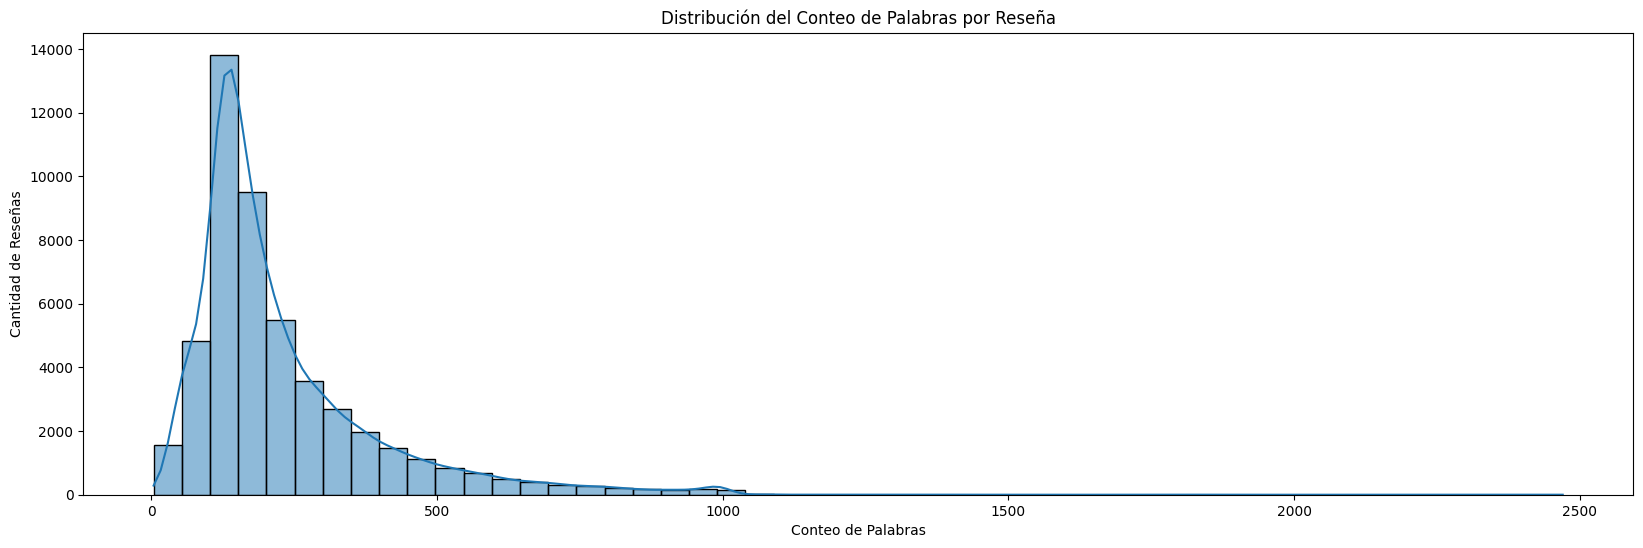

In [ ]:
# Función para contar palabras en una reseña
def word_count(review):
  return len(review.split())

# Aplicar la función a cada review y guardar el conteo en una nueva columna
df['word_count'] = df['review'].apply(word_count)

# Imprimir los primeros registros para verificar
#print(df[['review', 'word_count']].head())

print('---------------------------------------------------------------------------------------------------------------')
print('Estadísticas descriptivas')

# Mostrar estadísticas descriptivas del conteo de palabras
print(df['word_count'].describe())


print('---------------------------------------------------------------------------------------------------------------')
# Graficar la distribución del conteo de palabras
plt.figure(figsize=(20, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Distribución del Conteo de Palabras por Reseña')
plt.xlabel('Conteo de Palabras')
plt.ylabel('Cantidad de Reseñas')
plt.show()

# **4. Los modelos**

**4.1 Modelo 1**

El Modelo 1 es es un modelo básico que utiliza el dataset sin ninguna técnica como eliminación de stopwords, TD-IDF o el uso de n-gramas. La idea es probar la eficiencia de un modelo sencillo sin la necesidad de adicionar estrategias y tener así un punto de partida con el cual evaluar futuros modelos.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8918
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



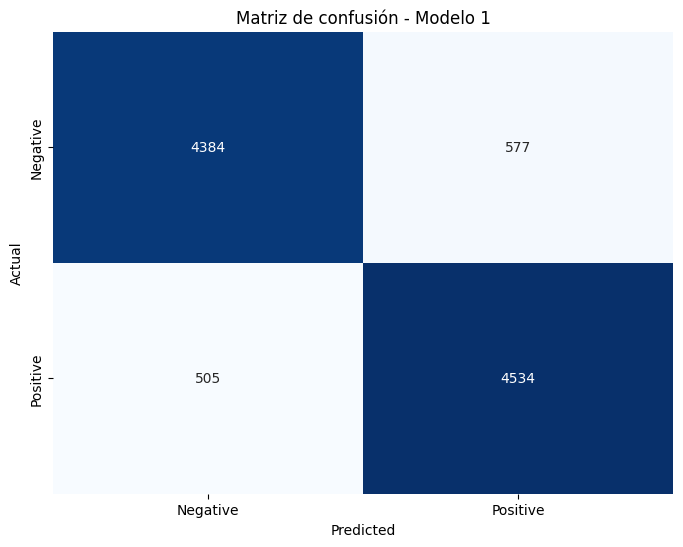

In [ ]:
# Convertir los sentimientos a numérico (positivo = 1, negativo = 0)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


# Crear un vectorizador de conteo (CountVectorizer)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_vec)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión - Modelo 1')
plt.show()

Este primer modelo se ejecuta en más de 25 segundos y arroja un accuracy de 0.8918. Para ser un modelo sin ningún tipo de estrategia más que el uso de un vectorizador, es bastante eficiente. Sin embargo, veamos cómo mejora (o no) si empezamos a utilizar otras técnicas.

**4.2 Modelo 2**

En el Modelo 2 utilizamos dos técnicas juntas: la eliminación de stopwords (palabras que no oportan ningún significado en el modelo) y el uso de TD-IDF(técnica que evalúa la importancia relativa de una palabra en un texto en base a su frecuencia).

Para ver la fuerte presencia de stopwords en el conjunto de datos, se presenta el siguiente cuadro con un top de las 20 stopwords más frecuentes. Son palabras vacías que pueden ralentizar el procesamiento de nuestros datos. La palabra con mayor frecuencia es 'the' con alrededor de 600 000 apariciones. A esta le siguen 'a', 'end', 'of' y 'to'.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


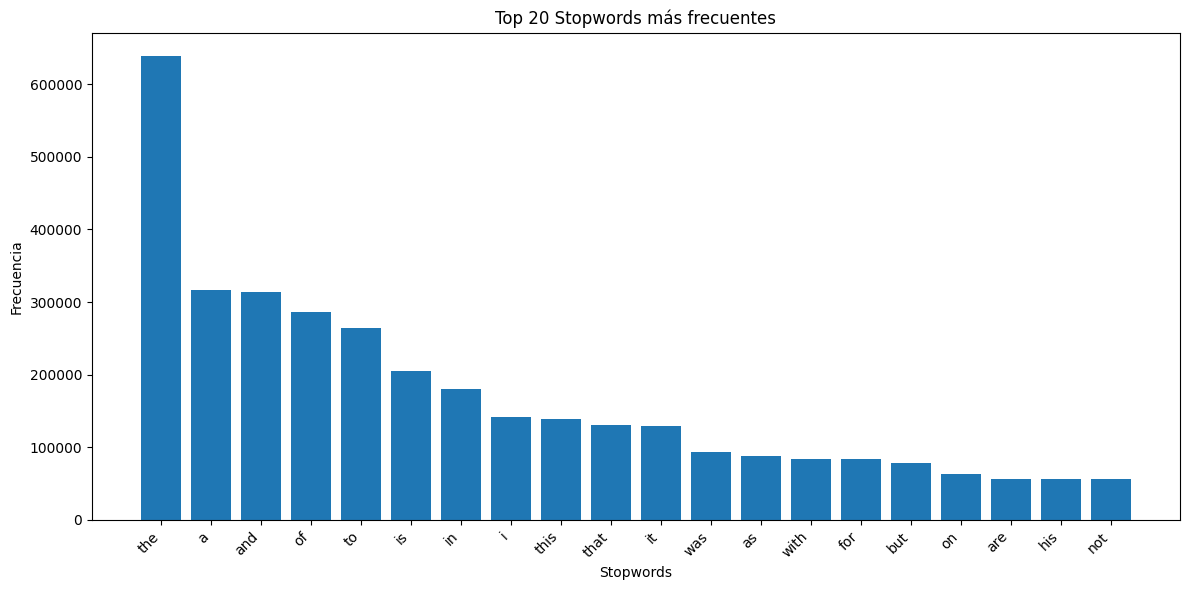

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# ... (your existing code)

# Obtener stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para contar stopwords en una lista de textos
def count_stopwords(texts):
    stopword_counts = {}
    for text in texts:
        words = text.lower().split()
        for word in words:
            if word in stop_words:
                stopword_counts[word] = stopword_counts.get(word, 0) + 1
    return stopword_counts

# Contar stopwords en los datos de entrenamiento y prueba
stopwords_train = count_stopwords(X_train)
stopwords_test = count_stopwords(X_test)

# Combinar los conteos de stopwords
all_stopwords = {}
for word, count in stopwords_train.items():
    all_stopwords[word] = all_stopwords.get(word, 0) + count
for word, count in stopwords_test.items():
    all_stopwords[word] = all_stopwords.get(word, 0) + count


# Ordenar el diccionario de conteo de stopwords por frecuencia
sorted_stopwords = dict(sorted(all_stopwords.items(), key=lambda item: item[1], reverse=True))

# Mostrar las 20 stopwords más frecuentes
top_20_stopwords = dict(list(sorted_stopwords.items())[:20])

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20_stopwords.keys(), top_20_stopwords.values())
plt.xlabel('Stopwords')
plt.ylabel('Frecuencia')
plt.title('Top 20 Stopwords más frecuentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Ajustar para evitar superposiciones
plt.show()

Siguiendo con la puesta en marcha del modelo, eliminamos las stopwords y usamos TD-IDF:

Accuracy (TF-IDF): 0.8942
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



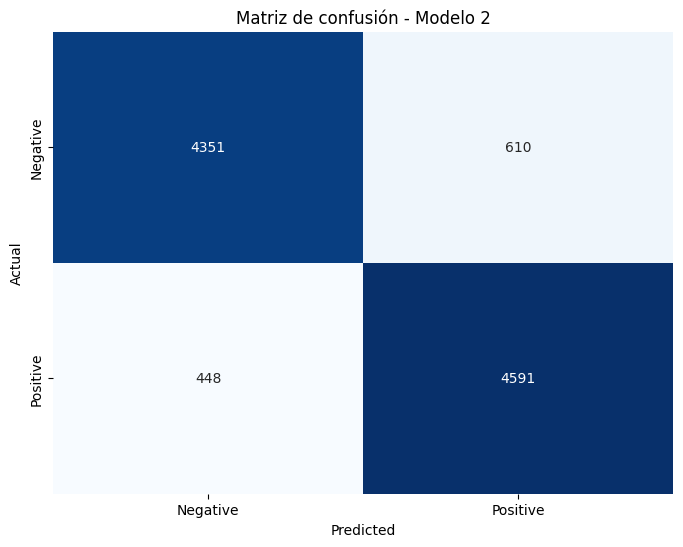

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un vectorizador TF-IDF, eliminando stopwords
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transformar los datos de entrenamiento y prueba usando TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entrenar un modelo de regresión logística con los datos TF-IDF
model_tfidf = LogisticRegression()
model_tfidf.fit(X_train_tfidf, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Evaluar el modelo TF-IDF
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy (TF-IDF): {accuracy_tfidf}")
print(classification_report(y_test, y_pred_tfidf))

# Mostrar la matriz de confusión para el modelo TF-IDF
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión - Modelo 2')
plt.show()

Tal como se puede apreciar, el accuracy aumenta ligeramente de 0.8918 a 0.8942. Algo que hay que mencionar es que este codigo demora alrededor de diez segundos menos en ejecutarse y demuestra ser más eficiente.

predicciones

**4.3 Modelo 3**

Finalmente, aunque nuestros modelos anteriores han demostrado ser eficientes, decidimos implementar el uso de n-gramas para acercarnos a una mejor predicción. Veamos qué tal funciona.

Accuracy (N-grams): 0.9103
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4961
           1       0.91      0.92      0.91      5039

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



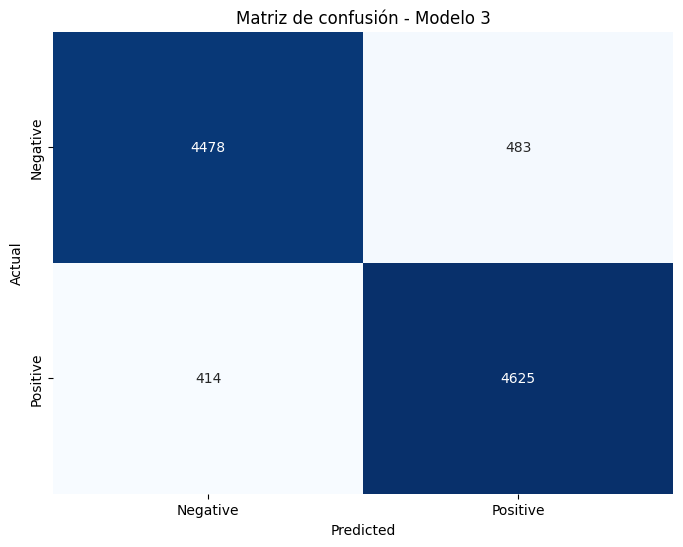

In [ ]:
# Vectorizador de conteo (CountVectorizer) con n-gramas (bigramas en este caso)
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Unigramas y bigramas

# Transformar los datos de entrenamiento y prueba
X_train_ngram = ngram_vectorizer.fit_transform(X_train)
X_test_ngram = ngram_vectorizer.transform(X_test)

# Entrenar un modelo de regresión logística
model_ngram = LogisticRegression(max_iter=1000)  # Increased max_iter
model_ngram.fit(X_train_ngram, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_ngram = model_ngram.predict(X_test_ngram)

# Evaluar el modelo
accuracy_ngram = accuracy_score(y_test, y_pred_ngram)
print(f"Accuracy (N-grams): {accuracy_ngram}")
print(classification_report(y_test, y_pred_ngram))

# Mostrar la matriz de confusión
cm_ngram = confusion_matrix(y_test, y_pred_ngram)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ngram, annot=True, fmt='d', cmap='Blues', cbar=False,
          xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión - Modelo 3')
plt.show()

Este código, aunque nos entrega un modelo con más eficiencia (arroja un accuracy de 0.9103), tiene mayor carga computacional y demora más de tres minutos en terminar de ejecutarse.

# **5. Conclusiones**

El análisis de sentimientos y el procesamiento del lenguaje natural (NLP) desempeñan un papel fundamental en la extracción de información valiosa de grandes volúmenes de texto. Sin embargo, su implementación requiere cuidados específicos. La calidad de la clasificación previa, como la categorización en positivo y negativo utilizada en este proyecto, influye significativamente en el rendimiento final de los modelos. Es crucial considerar que errores en esta etapa inicial pueden propagarse y afectar los resultados globales.

Además, técnicas como TF-IDF y n-gramas, aunque efectivas, pueden introducir sesgos si los datos de entrenamiento no son representativos del contexto real. Por ejemplo, un modelo entrenado con un vocabulario limitado podría no generalizar bien a textos con estructuras o términos diferentes. Este proyecto destaca la importancia de un diseño riguroso en todas las etapas, desde la selección de datos hasta el preprocesamiento y la evaluación de modelos, para garantizar conclusiones sólidas y aplicables.

Habiendo puesto a prueba los tres modelos, debemos decidir cuál usar. El proyecto demuestra que el preprocesamiento del texto y la selección de representaciones adecuadas, como TF-IDF y n-gramas, son cruciales para mejorar el rendimiento de los modelos de análisis de sentimientos. Aunque el modelo con n-gramas resultó ser el más efectivo en términos de Accuracy (0.9103), se optó por utilizar el modelo con eliminación de stopwords y TF-IDF debido a su menor demanda computacional y tiempo de ejecución. Esto resalta cómo el balance entre efectividad y eficiencia también juega un papel importante en la selección del modelo final.

Finalmente, proporcionamos un código en el que se puede agregar alguna reseña breve y, con ayuda del Modelo 2, detectar el sentimiento.

In [ ]:
def predict_sentiment(review):
    review_vec = tfidf_vectorizer.transform([review])
    prediction = model_tfidf.predict(review_vec)[0]
    if prediction == 1:
        return "Positive"
    else:
        return "Negative"


# Get user input
user_review = input("Enter your movie review: ")

# Predict sentiment
sentiment = predict_sentiment(user_review)
print(f"The sentiment of the review is: {sentiment}")

Enter your movie review: This is a good movie. A good one among the bad ones.
The sentiment of the review is: Negative
